In [104]:
#Please make sure to run this block if you have not already downloaded sodapy
#Sodapy is an API that lets us download data
import sys
!{sys.executable} -m pip install sodapy

DATA GENERATION: In this section, I generate data from

https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam

I use an available API that links directly with Python Pandas and allows me to form a dataframe.

In [1]:
#This code is taken from an API: https://dev.socrata.com/foundry/data.cityofnewyork.us/uvxr-2jwn

import pandas as pd
from sodapy import Socrata
import numpy as np
import seaborn as sns

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.

#Our dataset isn't even that long, so 2000 is a good limit.
results = client.get("uvxr-2jwn", limit=2000)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

In [2]:
df #display dataframe

,age_adjusted_death_rate,death_rate,deaths,leading_cause,race_ethnicity,sex,year
0,7.6,6.2,32,"Accidents Except Drug Posioning (V01-X39, X43,...",Asian and Pacific Islander,F,2007
1,8.1,8.3,87,"Accidents Except Drug Posioning (V01-X39, X43,...",Black Non-Hispanic,F,2007
2,7.1,6.1,71,"Accidents Except Drug Posioning (V01-X39, X43,...",Hispanic,F,2007
3,.,.,.,"Accidents Except Drug Posioning (V01-X39, X43,...",Not Stated/Unknown,F,2007
4,.,.,.,"Accidents Except Drug Posioning (V01-X39, X43,...",Other Race/ Ethnicity,F,2007
5,7.3,11.3,162,"Accidents Except Drug Posioning (V01-X39, X43,...",White Non-Hispanic,F,2007
6,13,11,53,"Accidents Except Drug Posioning (V01-X39, X43,...",Asian and Pacific Islander,M,2007
7,20.6,18.5,158,"Accidents Except Drug Posioning (V01-X39, X43,...",Black Non-Hispanic,M,2007
8,17.4,14.1,154,"Accidents Except Drug Posioning (V01-X39, X43,...",Hispanic,M,2007
9,.,.,8,"Accidents Except Drug Posioning (V01-X39, X43,...",Not Stated/Unknown,M,2007


In [3]:
#Store relevant values inside lists to see what make up the relevant features
races = df.race_ethnicity.unique().tolist()
leadcause = df.leading_cause.unique().tolist()
year = df.year.unique().tolist()

In [4]:
races

['Asian and Pacific Islander',
 'Black Non-Hispanic',
 'Hispanic',
 'Not Stated/Unknown',
 'Other Race/ Ethnicity',
 'White Non-Hispanic',
 'Non-Hispanic Black',
 'Non-Hispanic White']

In [5]:
leadcause

['Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)',
 'All Other Causes',
 "Alzheimer's Disease (G30)",
 'Aortic Aneurysm and Dissection (I71)',
 'Assault (Homicide: Y87.1, X85-Y09)',
 'Atherosclerosis (I70)',
 'Cerebrovascular Disease (Stroke: I60-I69)',
 'Certain Conditions originating in the Perinatal Period (P00-P96)',
 'Chronic Liver Disease and Cirrhosis (K70, K73)',
 'Chronic Lower Respiratory Diseases (J40-J47)',
 'Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q99)',
 'Diabetes Mellitus (E10-E14)',
 'Diseases of Heart (I00-I09, I11, I13, I20-I51)',
 'Essential Hypertension and Renal Diseases (I10, I12)',
 'Human Immunodeficiency Virus Disease (HIV: B20-B24)',
 'Influenza (Flu) and Pneumonia (J09-J18)',
 'Insitu or Benign / Uncertain Neoplasms (D00-D48)',
 'Intentional Self-Harm (Suicide: X60-X84, Y87.0)',
 'Malignant Neoplasms (Cancer: C00-C97)',
 'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Sub

In [6]:
year

['2007',
 '2008',
 '2009',
 '2013',
 '2010',
 '2011',
 '2012',
 '2014',
 '2015',
 '2016']

DATA TRANSFORMATION: Here, we will look at the data and perform some transoformations.
Note that scaling isn't performed since we will useing trees with xgboost (GBM)

In [8]:
#Change sex to numerical values to use in the future model
#This is done so that the gender can be passed as an actual feature in the model
df.loc[df['sex'] == 'F', 'sex'] = 0
df.loc[df['sex'] == 'M', 'sex'] = 1
df.loc[df['sex'] == 'Female', 'sex'] = 0
df.loc[df['sex'] == 'Male', 'sex'] = 1
df

,age_adjusted_death_rate,death_rate,deaths,leading_cause,race_ethnicity,sex,year
0,7.6,6.2,32,"Accidents Except Drug Posioning (V01-X39, X43,...",Asian and Pacific Islander,0,2007
1,8.1,8.3,87,"Accidents Except Drug Posioning (V01-X39, X43,...",Black Non-Hispanic,0,2007
2,7.1,6.1,71,"Accidents Except Drug Posioning (V01-X39, X43,...",Hispanic,0,2007
3,.,.,.,"Accidents Except Drug Posioning (V01-X39, X43,...",Not Stated/Unknown,0,2007
4,.,.,.,"Accidents Except Drug Posioning (V01-X39, X43,...",Other Race/ Ethnicity,0,2007
5,7.3,11.3,162,"Accidents Except Drug Posioning (V01-X39, X43,...",White Non-Hispanic,0,2007
6,13,11,53,"Accidents Except Drug Posioning (V01-X39, X43,...",Asian and Pacific Islander,1,2007
7,20.6,18.5,158,"Accidents Except Drug Posioning (V01-X39, X43,...",Black Non-Hispanic,1,2007
8,17.4,14.1,154,"Accidents Except Drug Posioning (V01-X39, X43,...",Hispanic,1,2007
9,.,.,8,"Accidents Except Drug Posioning (V01-X39, X43,...",Not Stated/Unknown,1,2007


It should be noted that the race_ethnicity variables of "not states/unknown" and "other race/ethnicity" have generally blank fields in the death rate and deaths. I will be excluding them. 

In [9]:
#Change the races and ethnicities to integers to be used in the GBM.
df.loc[df['race_ethnicity'] == 'Asian and Pacific Islander', 'race_ethnicity'] = 0
df.loc[df['race_ethnicity'] == 'Black Non-Hispanic', 'race_ethnicity'] = 1
df.loc[df['race_ethnicity'] == 'Hispanic', 'race_ethnicity'] = 2
df.loc[df['race_ethnicity'] == 'White Non-Hispanic', 'race_ethnicity'] = 3
df.loc[df['race_ethnicity'] == 'Non-Hispanic Black', 'race_ethnicity'] = 4
df.loc[df['race_ethnicity'] == 'Non-Hispanic White', 'race_ethnicity'] = 5
df


,age_adjusted_death_rate,death_rate,deaths,leading_cause,race_ethnicity,sex,year
0,7.6,6.2,32,"Accidents Except Drug Posioning (V01-X39, X43,...",0,0,2007
1,8.1,8.3,87,"Accidents Except Drug Posioning (V01-X39, X43,...",1,0,2007
2,7.1,6.1,71,"Accidents Except Drug Posioning (V01-X39, X43,...",2,0,2007
3,.,.,.,"Accidents Except Drug Posioning (V01-X39, X43,...",Not Stated/Unknown,0,2007
4,.,.,.,"Accidents Except Drug Posioning (V01-X39, X43,...",Other Race/ Ethnicity,0,2007
5,7.3,11.3,162,"Accidents Except Drug Posioning (V01-X39, X43,...",3,0,2007
6,13,11,53,"Accidents Except Drug Posioning (V01-X39, X43,...",0,1,2007
7,20.6,18.5,158,"Accidents Except Drug Posioning (V01-X39, X43,...",1,1,2007
8,17.4,14.1,154,"Accidents Except Drug Posioning (V01-X39, X43,...",2,1,2007
9,.,.,8,"Accidents Except Drug Posioning (V01-X39, X43,...",Not Stated/Unknown,1,2007


In [10]:
#Now I am labeling the disease states with numbers with numbers for use in the GBM
df1 = df

df1.loc[df['leading_cause'] == 'Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)', 'leading_cause'] = 0
df1.loc[df['leading_cause'] == 'All Other Causes', 'leading_cause'] = 1
df1.loc[df['leading_cause'] == "Alzheimer's Disease (G30)", 'leading_cause'] = 2
df1.loc[df['leading_cause'] == 'Aortic Aneurysm and Dissection (I71)', 'leading_cause'] = 3
df1.loc[df['leading_cause'] == 'Assault (Homicide: Y87.1, X85-Y09)', 'leading_cause'] = 4
df1.loc[df['leading_cause'] == 'Atherosclerosis (I70)', 'leading_cause'] = 5
df1.loc[df['leading_cause'] == 'Cerebrovascular Disease (Stroke: I60-I69)', 'leading_cause'] = 6
df1.loc[df['leading_cause'] == 'Certain Conditions originating in the Perinatal Period (P00-P96)', 'leading_cause'] = 7
df1.loc[df['leading_cause'] == 'Chronic Liver Disease and Cirrhosis (K70, K73)', 'leading_cause'] = 8
df1.loc[df['leading_cause'] == 'Chronic Lower Respiratory Diseases (J40-J47)', 'leading_cause'] = 9
df1.loc[df['leading_cause'] == 'Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q99)', 'leading_cause'] = 10
df1.loc[df['leading_cause'] == 'Diabetes Mellitus (E10-E14)', 'leading_cause'] = 11
df1.loc[df['leading_cause'] == 'Diseases of Heart (I00-I09, I11, I13, I20-I51)', 'leading_cause'] = 12
df1.loc[df['leading_cause'] == 'Essential Hypertension and Renal Diseases (I10, I12)', 'leading_cause'] = 13
df1.loc[df['leading_cause'] == 'Human Immunodeficiency Virus Disease (HIV: B20-B24)', 'leading_cause'] = 14
df1.loc[df['leading_cause'] == 'Influenza (Flu) and Pneumonia (J09-J18)', 'leading_cause'] = 15
df1.loc[df['leading_cause'] == 'Insitu or Benign / Uncertain Neoplasms (D00-D48)', 'leading_cause'] = 16
df1.loc[df['leading_cause'] == 'Intentional Self-Harm (Suicide: X60-X84, Y87.0)', 'leading_cause'] = 17
df1.loc[df['leading_cause'] == 'Malignant Neoplasms (Cancer: C00-C97)', 'leading_cause'] = 18
df1.loc[df['leading_cause'] == 'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)', 'leading_cause'] = 19
df1.loc[df['leading_cause'] == 'Nephritis, Nephrotic Syndrome and Nephrisis (N00-N07, N17-N19, N25-N27)', 'leading_cause'] = 20
df1.loc[df['leading_cause'] == 'Septicemia (A40-A41)', 'leading_cause'] = 21
df1.loc[df['leading_cause'] == 'Viral Hepatitis (B15-B19)', 'leading_cause'] = 22
df1.loc[df['leading_cause'] == "Parkinson's Disease (G20)", 'leading_cause'] = 23
df1.loc[df['leading_cause'] == 'Tuberculosis (A16-A19)', 'leading_cause'] = 24
df1.loc[df['leading_cause'] == 'Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)', 'leading_cause'] = 0 #Repeat of first one, but has an error
df1.loc[df['leading_cause'] == 'Peptic Ulcer (K25-K28)', 'leading_cause'] = 25
df1.loc[df['leading_cause'] == 'Assault (Homicide: U01-U02, Y87.1, X85-Y09)', 'leading_cause'] = 26
df1.loc[df['leading_cause'] == 'Chronic Liver Disease and Cirrhosis (K70, K73-K74)', 'leading_cause'] = 27
df1.loc[df['leading_cause'] == 'Intentional Self-Harm (Suicide: U03, X60-X84, Y87.0)', 'leading_cause'] = 28
df1.loc[df['leading_cause'] == 'Meningitis (G00, G03)', 'leading_cause'] = 29
df1.loc[df['leading_cause'] == 'Mental and Behavioral Disorders due to Use of Alcohol (F10)', 'leading_cause'] = 30

df1


,age_adjusted_death_rate,death_rate,deaths,leading_cause,race_ethnicity,sex,year
0,7.6,6.2,32,0,0,0,2007
1,8.1,8.3,87,0,1,0,2007
2,7.1,6.1,71,0,2,0,2007
3,.,.,.,0,Not Stated/Unknown,0,2007
4,.,.,.,0,Other Race/ Ethnicity,0,2007
5,7.3,11.3,162,0,3,0,2007
6,13,11,53,0,0,1,2007
7,20.6,18.5,158,0,1,1,2007
8,17.4,14.1,154,0,2,1,2007
9,.,.,8,0,Not Stated/Unknown,1,2007


In [11]:
#Now, we will get rid of the race and ethnicities with unknown quantities for death and death rate
df2 = df1.dropna()
df2 = df2[df2.race_ethnicity != 'Not Stated/Unknown']
df2 = df2[df2.race_ethnicity != 'Other Race/ Ethnicity']

In [12]:
df2

,age_adjusted_death_rate,death_rate,deaths,leading_cause,race_ethnicity,sex,year
0,7.6,6.2,32,0,0,0,2007
1,8.1,8.3,87,0,1,0,2007
2,7.1,6.1,71,0,2,0,2007
5,7.3,11.3,162,0,3,0,2007
6,13,11,53,0,0,1,2007
7,20.6,18.5,158,0,1,1,2007
8,17.4,14.1,154,0,2,1,2007
11,19.8,22.2,297,0,3,1,2007
12,44.6,35.3,182,1,0,0,2007
13,113.4,116.8,1230,1,1,0,2007


In [13]:
df2.dtypes #Eeverything is still an object, but must become a float for use in GBM

age_adjusted_death_rate    object
death_rate                 object
deaths                     object
leading_cause              object
race_ethnicity             object
sex                        object
year                       object
dtype: object

In [14]:
df2.deaths= df2.deaths.astype(float)
df2.age_adjusted_death_rate = df2.age_adjusted_death_rate.astype(float)
df2.death_rate = df2.death_rate.astype(float)
df2.leading_cause = df2.leading_cause.astype(float)
df2.race_ethnicity = df2.race_ethnicity.astype(float)
df2.sex = df2.sex.astype(float)

In [15]:
df2.dtypes

age_adjusted_death_rate    float64
death_rate                 float64
deaths                     float64
leading_cause              float64
race_ethnicity             float64
sex                        float64
year                        object
dtype: object

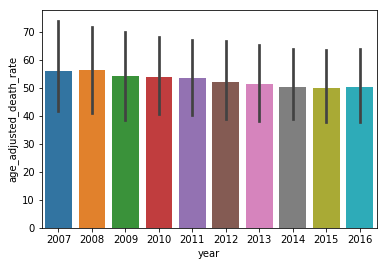

In [17]:
#Let's visualize our final data set
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

year = df2['year']
lead = df2['leading_cause']
eth = df2['race_ethnicity']
sex = df2['sex']
aadr = df2['age_adjusted_death_rate']

ax = sns.barplot(year, aadr) #year vs death rate

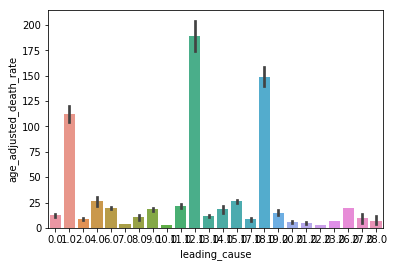

In [75]:
bx = sns.barplot(lead, aadr) #cause of death vs death rate

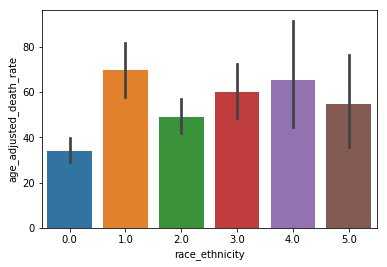

In [19]:
cx = sns.barplot(eth, aadr) #ethnicity vs death rate

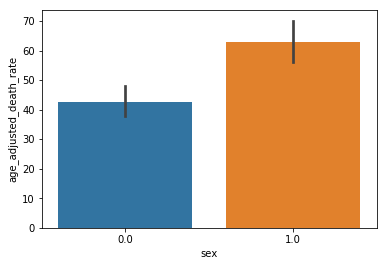

In [20]:
dx = sns.barplot(sex, aadr) #sex vs death rate

Main Takeaway: our data isn't normally distributed. In fact, it is hard to see any trends. For this reason, a graident boosted machine is ideal to make preductions where we can't otherwise see trends.

DATA INGESTION: Here, I export the datafile into a csv file that can be used by future researchers.

In [112]:
df.to_csv(r'C:\Users\wr225\Desktop\'NYC DEATH DATA.csv')

DEVELOPMENT AND USE OF MACHINE LEARNING MODEL: Here, I design a graident boosted machine to make a prediction on the age_adjusted_death_rate based on the parameters of leading_cause, race_ethnicity, and sex. This was fine tuned after many attempts. 

In [116]:
import numpy as np
from sklearn.model_selection import train_test_split
X = df2[['leading_cause', 'race_ethnicity', 'sex']]
y = df2[['age_adjusted_death_rate']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [139]:
import xgboost as xgb
data = xgb.DMatrix(data=X_train, label=y_train)
xgb_params = {
    "eta": 0.1,
    "subsample": 0.5,
    "colsample_bytree": 0.75,
    "max_depth": 15,
    "objective": "reg:linear",
    "eval_metric": "rmse",
    "early_stopping_rounds": 10,
}

xgbmodel = xgb.train(params=xgb_params, dtrain=data, num_boost_round=100)
cv_history = xgb.cv(params=xgb_params, dtrain=data, num_boost_round=100, nfold=5,
                    callbacks=[xgb.callback.print_evaluation(show_stdv=False),
                               xgb.callback.early_stop(10)])

[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning en

Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:72.3511	test-rmse:72.2389
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\upd

[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:42.3697	test-rmse:43.5385
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src

[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[23]	train-rmse:30.6732	test-rmse:31.7054
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\

[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[34]	train-rmse:23.9319	test-rmse:25.2322
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src

[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[44]	train-rmse:20.409	test-rmse:22.0383
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\t

[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[55]	train-rmse:17.808	test-rmse:19.4446
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src

[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[66]	train-rmse:16.3639	test-rmse:18.1911
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\sr

[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[77]	train-rmse:15.5313	test-rmse:17.4249
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src

[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[88]	train-rmse:14.8188	test-rmse:16.8671
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\sr

[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:43:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[99]	train-rmse:14.2938	test-rmse:16.4322


In [140]:
#Let's do a prediction
y_test_pred = xgbmodel.predict(xgb.DMatrix(X_test))
# Generate class prediction based on max probability
y_test_pred_class = y_test_pred.argmax(axis=0)
y_test_pred_class

60

In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Here is the mean squared error:")
mean_squared_error(y_test, y_test_pred)

Here is the mean squared error:


130.2792732328778

In [132]:
print("Here is the R^2 error:")
r2_score(y_test, y_test_pred) #depth 15

Here is the R^2 error:


0.9756508206904327

This is a confusing result! Our RMSE is very high, but our R^2 score is very high. RMSE is only meaningful when we know the RMSE of our predictions within our dataset. However, that was not done here due issues that arose with size of the arrays. Our R^2 score shows that we made a model that fits the data very well.... almost too well. In fact, we may have overfit the data. 

In [138]:
#Now, after changing the depth to 2, we get a lower score, therefore a more general model that is useful.
r2_score(y_test, y_test_pred) #THIS IS ONLY AFTER DEPTH WAS CHANGED TO 2.

0.8639474524466401

In [141]:
#Depth 3
r2_score(y_test, y_test_pred)

0.9314500408173452

As you can see, changing the depth of our tree impacts the generality of our model. 